In [88]:
# Importing the necessary libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn.neighbors as knn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
# importing the dataset, conducting data exploration, cleansing and pre-processing.:

# Placeholder for dataset URL or file path
# Replace the following with the actual dataset URL or local file path

# Example of using a direct URL
# coffee_data = "https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset"

df = pd.read_csv("user_behavior_dataset.csv")
df.isnull().sum() # There doesn't seem to be any null values in the dataset.
df.isna().sum() # There doesn't seen to be any presence of na values in the dataset.
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


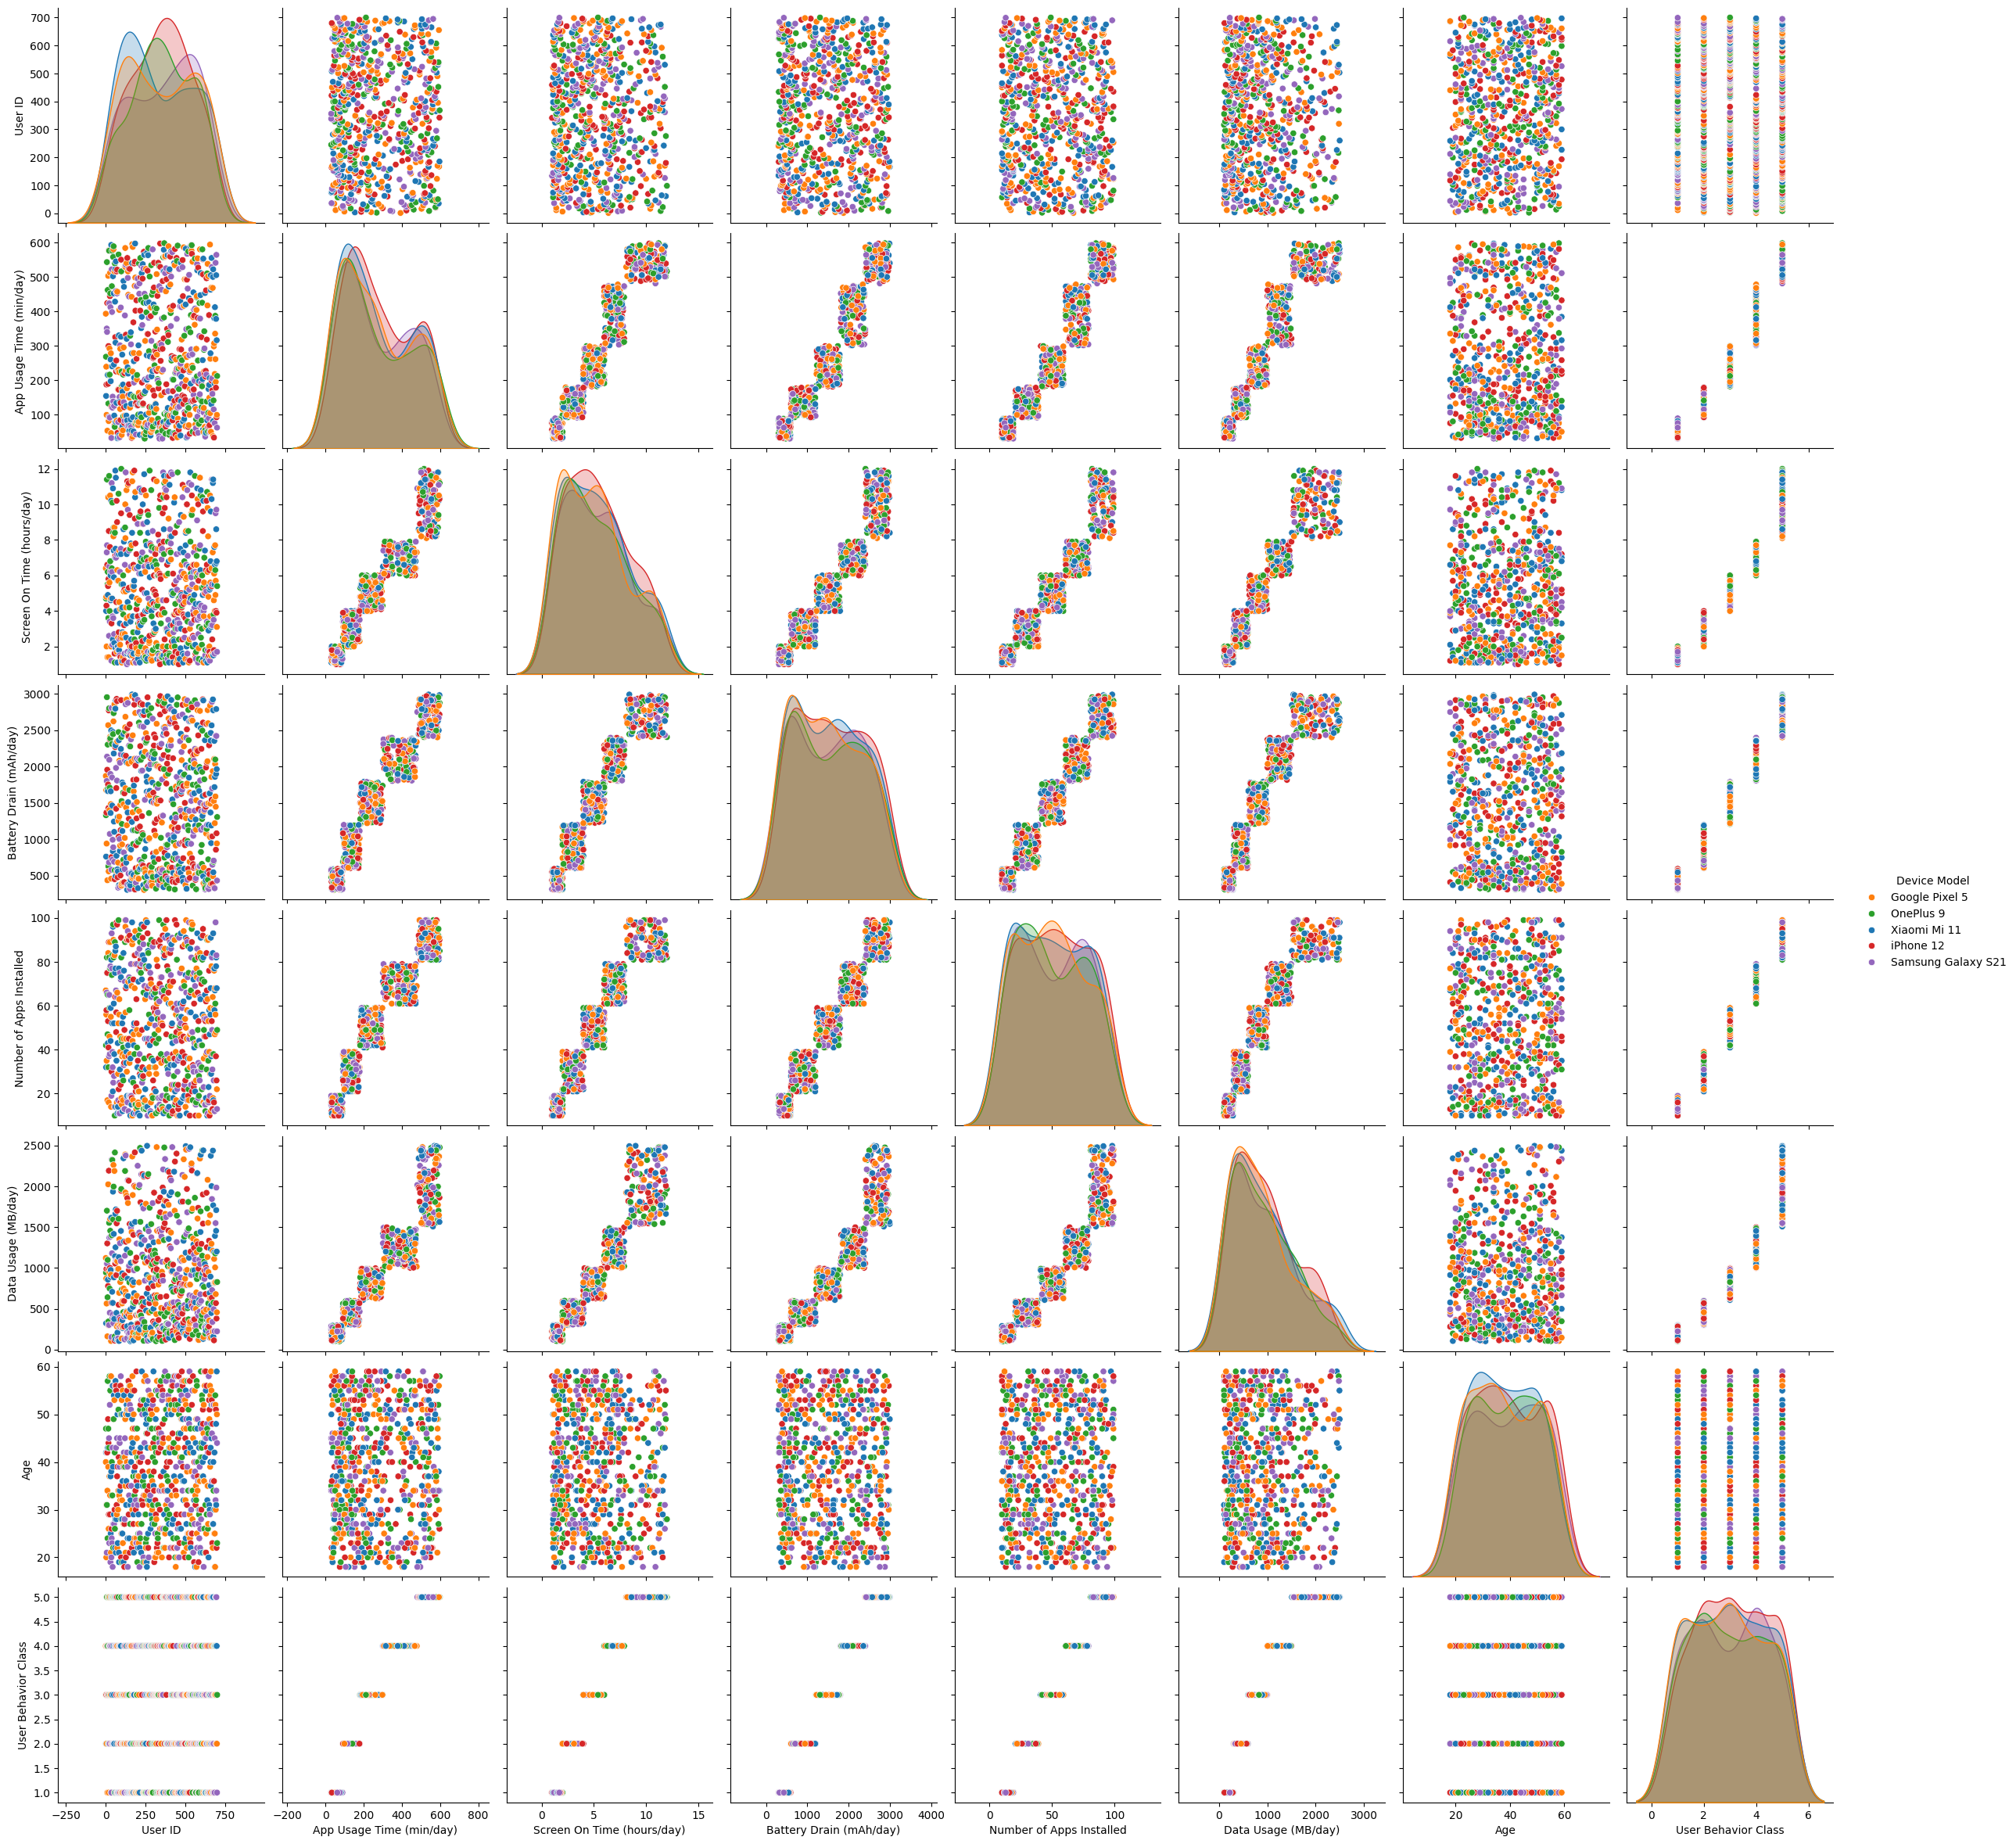

In [90]:
df['Device Model'].nunique() #finding out the number of smartphone models:
phone_models = {'Google Pixel 5': 'tab:orange',
                'OnePlus 9': 'tab:green',
                'Xiaomi Mi 11': 'tab:blue',
                'iPhone 12': 'tab:red',
                'Samsung Galaxy S21': 'tab:purple'}
sns.pairplot(df, hue='Device Model', palette=phone_models, height=3)

<Axes: >

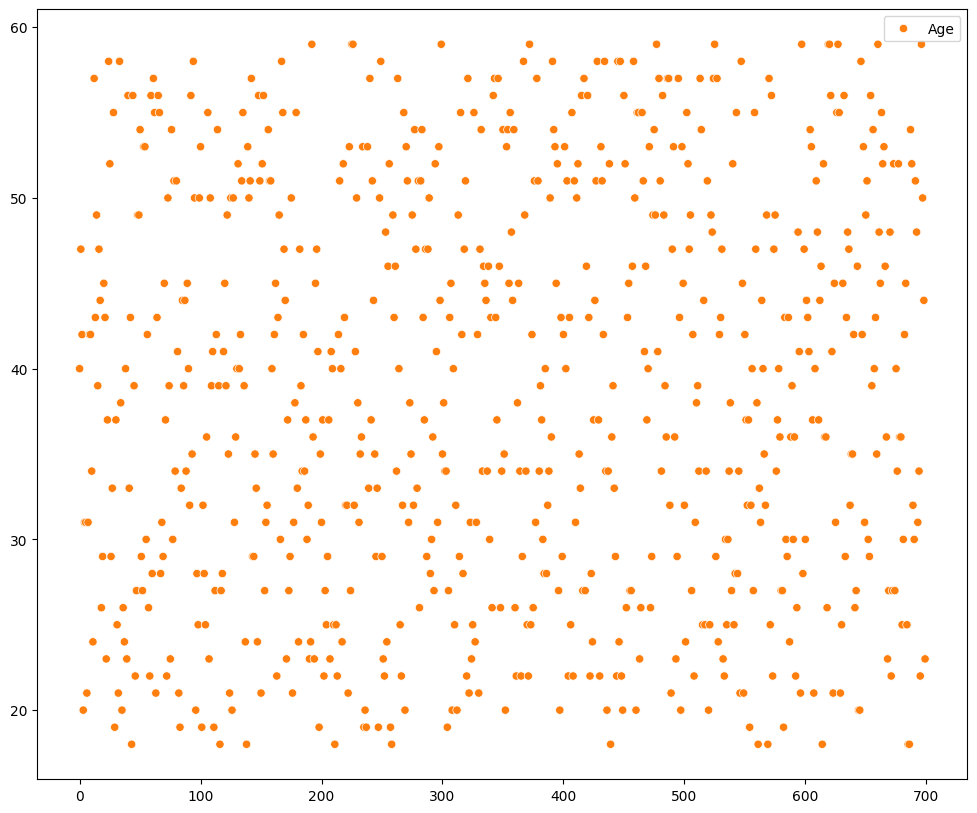

In [91]:
categories = {'Age': 'tab:orange',
                'Device Model': 'tab:green',
                'Screen On Time (hours/day)': 'tab:blue',
                'User ID': 'tab:red',
                'User Behavior Class': 'tab:purple',
                'App Usage Time (min/day)': 'brown',
                'Data Usage (MB/day)': 'black',
                'Battery Drain (mAh/day)': 'blue',
                'Number of Apps Installed': 'tab:grey'}
plt.figure(figsize=[12,10])
sns.scatterplot(df[['Age']], palette=categories, legend="auto")

<Axes: >

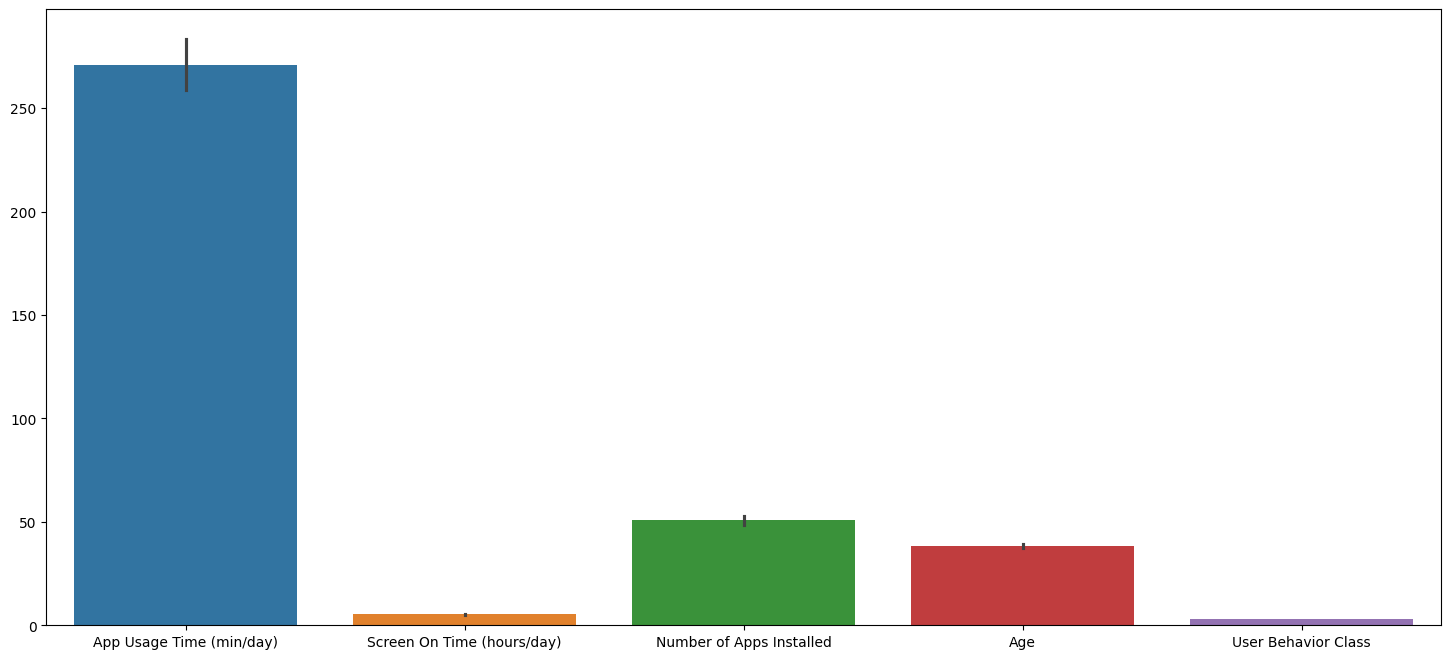

In [92]:
bar_data = df.drop(columns=['Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'User ID'], axis=1)
plt.figure(figsize=[18,8],edgecolor='black')
sns.barplot(bar_data)

In [93]:
# I will begin creating a model that focuses on the 'User Behavior Class' category. Perhaps I can determine which user belong to which class by using a KNN model.:

# I will begin by selecting the features for X that I want and define the target variable as the 'User Behavior Class'.: 	User ID	Device Model	Operating System	App Usage Time (min/day)	Screen On Time (hours/day)	Battery Drain (mAh/day)	Number of Apps Installed	Data Usage (MB/day)	Age	Gender	User Behavior Class

X_features = df.drop(columns=['Device Model', 'Operating System', 'User ID', 'User Behavior Class'])
# X_features.head() Double check to make sure the data is properly formatted and that not Y information exists to prevent data leakage.
X = pd.get_dummies(X_features)

Y = df['User Behavior Class']

In [94]:
# Next, I will continue with building out my train and test splits.:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3, stratify=Y)

print("The shape of both X and Y are: ", X_train.shape, Y_train.shape)

The shape of both X and Y are:  (490, 8) (490,)


In [95]:
# Now, I can create the KNN classifier and train it. Since the objective is to determine the best value for K (number of neighbors), I will create a function that will iterate through the training and accuracy evaluation process.:
from sklearn import metrics

def KNN_loop():
    error_rate = []
    for k in range(1, 100):
        model = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
        prediction = model.predict(X_test)
        #print(prediction[0:5])
        #print("The testing set accuracy is: ", metrics.accuracy_score(Y_test, prediction))
        error_rate.append(np.mean(prediction != Y_test))  # Calculate error rate and append to list
    return error_rate  # Return error_rate so you can plot or analyze it later

error_rate = KNN_loop()

C:\Users\Christopher K. Leal\AppData\Local\Temp\ipykernel_21148\1802971159.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


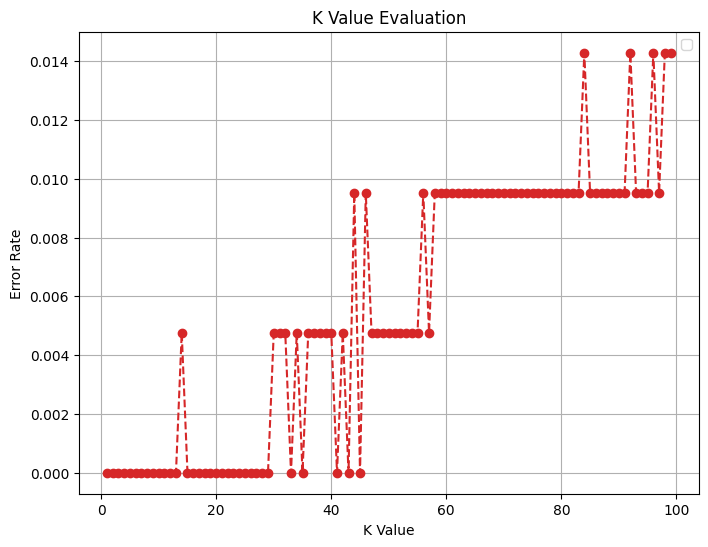

In [96]:
# Now, I will go ahead and plot the results of each value of 'K' to visualize the accuracy a lot easier.:

plt.figure(figsize=[8,6])
plt.plot(range(1,100), error_rate, linestyle='--', marker='o', color='tab:red')
plt.grid()
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("K Value Evaluation")
plt.legend()
plt.show()

In [97]:
# Now that I know what a good value for K is, I can now traing the model on that specific value this time around.:

from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=40).fit(X_train, Y_train)
prediction = model.predict(X_test)
metrics_report = metrics.classification_report(Y_test, prediction)
print(metrics_report)

scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)


              precision    recall  f1-score   support

           1       0.98      1.00      0.99        41
           2       1.00      0.98      0.99        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Cross-validation scores: [1.         1.         0.98979592 1.         1.        ]


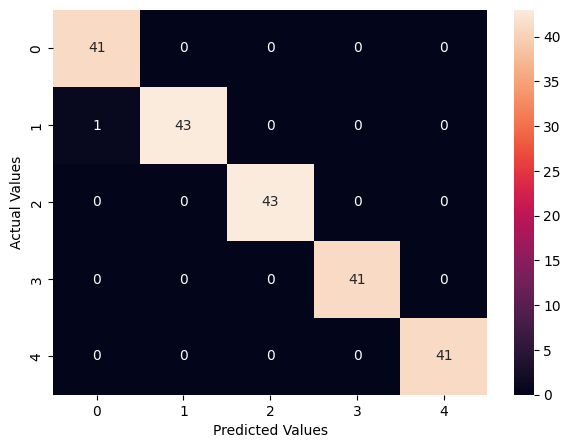

In [98]:
# It is a good practice to also implement a confusion matrix to map out the false positive, true positives, false negatives and true negatives. This can be easily accomplished with a heatmap from seaborn.:

confusion_mat = metrics.confusion_matrix(Y_test, prediction)

plt.figure(figsize=[7,5])
sns.heatmap(confusion_mat, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

c:\Users\Christopher K. Leal\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


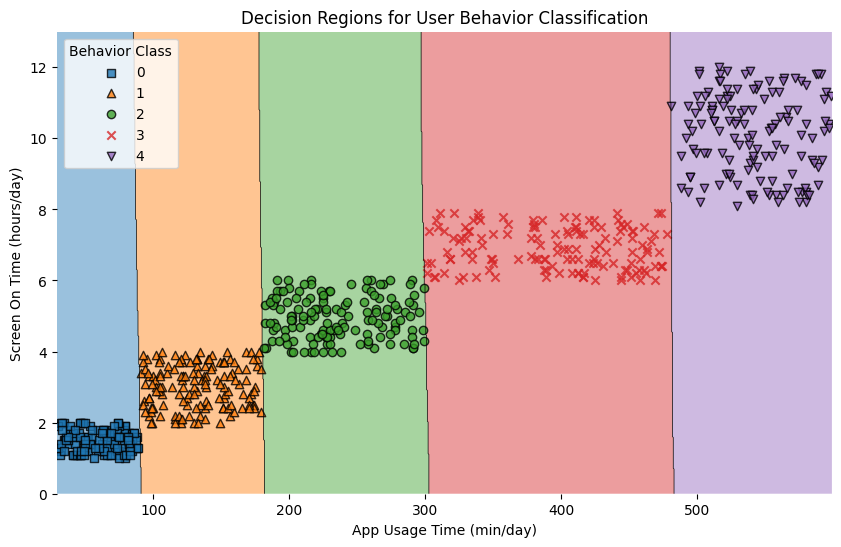

In [99]:
# Here, I needed to convert the X features to a nump array:
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].apply(pd.to_numeric, errors='coerce').dropna().to_numpy()

# Encode the target variable if it's not numeric
le = LabelEncoder()
Y = le.fit_transform(Y)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

# Plot decision regions using the unscaled (original) data
plt.figure(figsize=(10, 6))
plot_decision_regions(X, Y, clf=knn, legend=2)
plt.xlabel('App Usage Time (min/day)')  # Ensure this reflects the correct label
plt.ylabel('Screen On Time (hours/day)')
plt.title('Decision Regions for User Behavior Classification')
plt.legend(loc='upper left', title='Behavior Class')
plt.show()